In [1]:
import pandas as pd

In [19]:
df = pd.read_csv('../Dataset/retail_sales.csv')

In [20]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

D:\temp\ipykernel_11312\4183834281.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [21]:
df.set_index('Date', inplace=True)

<Axes: title={'center': 'Retail Sales'}, xlabel='Date'>

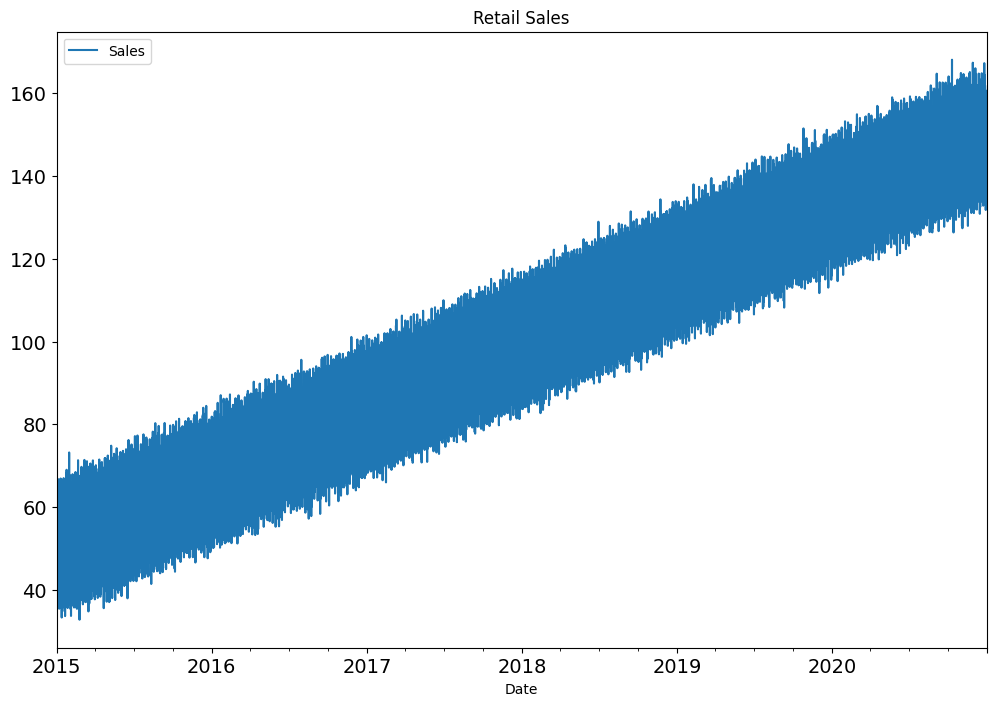

In [22]:
from matplotlib import pyplot as plt

df.plot(title='Retail Sales', figsize=(12, 8), fontsize=14)


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Sales'] = scaler.fit_transform(df[['Sales']])

In [ ]:
import numpy as np

def create_sequences(data, index, window_size):
    X, y, timestamps = [], [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
        timestamps.append(index[i + window_size])
    return np.array(X), np.array(y), np.array(timestamps)

window_size=24

X, y, ts = create_sequences(df['Sales'].values, df.index, window_size)




In [29]:
# Train/Test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
ts_train, ts_test = ts[:split_index], ts[split_index:]




In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


g:\Rahul's Projects\Timeseries-MLops\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0128 - val_loss: 3.8846e-04
Epoch 2/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.5994e-04 - val_loss: 4.0175e-04
Epoch 3/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 3.4181e-04 - val_loss: 5.7890e-04
Epoch 4/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 3.4839e-04 - val_loss: 3.5084e-04
Epoch 5/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.4085e-04 - val_loss: 3.3247e-04
Epoch 6/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.4608e-04 - val_loss: 5.3301e-04
Epoch 7/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.4094e-04 - val_loss: 3.2383e-04
Epoch 8/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.3119e-04 - val_loss: 3.7744e-04
Epoch 9/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3.4148e-04 - val_loss: 4.0456e-04
Epoch 10/10
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 3.2709e-04 - val_loss: 3.3024e-04


In [32]:
# Predict
y_pred = model.predict(X_test)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


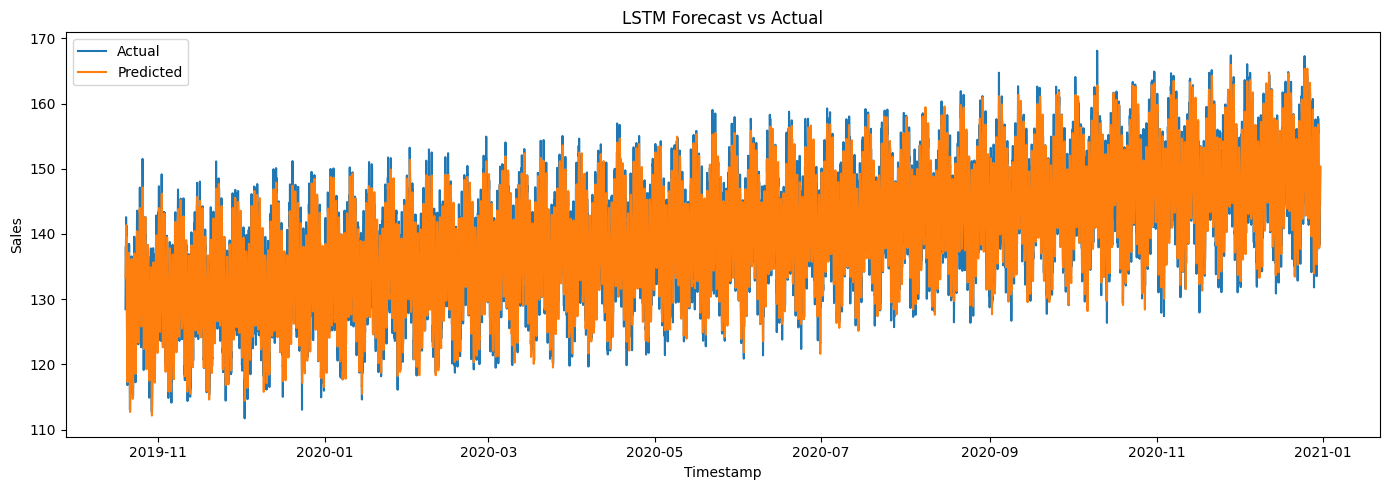

In [33]:
# Inverse scale (optional)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot with datetime index
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(ts_test, y_test_rescaled, label='Actual')
plt.plot(ts_test, y_pred_rescaled, label='Predicted')
plt.xlabel("Timestamp")
plt.ylabel("Sales")
plt.title("LSTM Forecast vs Actual")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
output = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'Predicted': y_pred_rescaled.flatten()
})

In [17]:
output

,Actual,Predicted
0,128.459712,130.218430
1,133.615522,130.814133
2,136.702109,132.837311
3,138.046735,135.212311
4,136.735653,137.046738
...,...,...
10508,140.946779,142.692886
10509,145.561324,143.529724
10510,144.484071,145.358932
10511,147.890291,146.325912


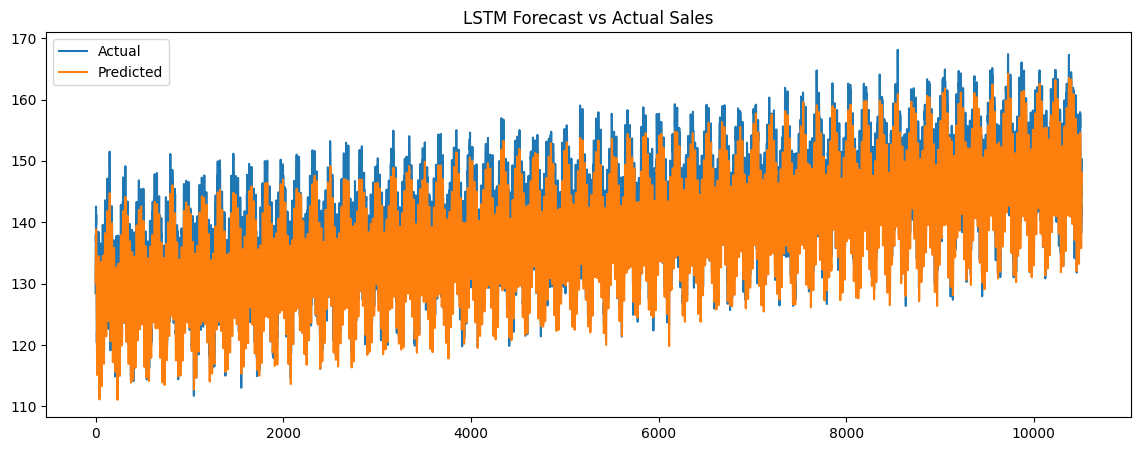

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.title("LSTM Forecast vs Actual Sales")
plt.show()
